# Some Math to get started
SGMS 2025

This code will go through some basic concepts on Algebra and Calculus.

- Matrix

- Vector Space

- Matrix Multiplication

- Linear Independence

- Norms

- Inner Product

- Determinant

- Trace

- Eigenvalues and Eigenvectors

- Orthogonal Projection

- Matrix Approximation

Start with the necessary libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

Just setting some preliminary code for the visualizations


In [4]:
# Consistent font for plot titles :p
rcParams['font.family'] = 'DejaVu Sans'

# I. Matrices
*****

## Matrix

A matrix is a rectangular array of numbers (or other mathematical objects) arranged in rows and columns.  It's a fundamental concept in linear algebra, used to represent linear transformations, systems of equations, and more.

**Definition:** An m x n matrix A is a rectangular array of elements a<sub>ij</sub>, where i represents the row number and j represents the column number.

$$ A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix} $$

**Visualization:** It can also be visualized as a collection of vectors.  Each row (or column) can be interpreted as a vector in n-dimensional (or m-dimensional) space.

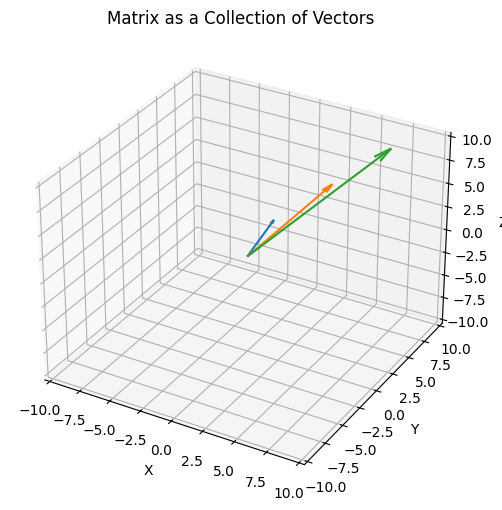

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example 3x3 matrix (for 3D visualization)
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Plotting the rows as vectors
for i in range(matrix.shape[0]):
    row = matrix[i]
    ax.quiver(0, 0, 0, row[0], row[1], row[2], arrow_length_ratio=0.1, color=f'C{i}')  # Different colors for rows

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Matrix as a Collection of Vectors')
plt.show()

## **Python Code Example:**
### Creating a matrix

In [6]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Accessing elements of the matrix:

In [7]:
print(matrix[0, 1])  # Element at row 0, column 1 (output: 2)

2


### Matrix dimensions

In [8]:
print(matrix.shape)  # (rows, columns) (output: (3, 3))

(3, 3)


### Transpose of the matrix

In [9]:
print(matrix.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


# II. Vector Spaces
****

A vector space is a set of vectors that can be scaled (scalar multiplication) and added together (vector addition) while remaining in the same space. It is defined over a field of scalars (usually real numbers).

**Definition:** A vector space V over a field F is a set with two operations:

- Vector addition:  For any u, v ∈ V, u + v ∈ V.
- Scalar multiplication: For any u ∈ V and any scalar c ∈ F, c * u ∈ V.

These operations must satisfy certain axioms (e.g., associativity, commutativity, distributivity, existence of zero vector and additive inverse).

Imagine each row vector as defining a "direction" in 3D space.  The plane we associate with that row vector is a 2D subspace that contains that line (defined by the row vector).  It's as if we're "widening" our view from just the line (spanned by the row vector) to a plane that includes that line. This plane shows all the vectors that can be created by scaling the row vector and adding vectors that are orthogonal to it. 

## Example of a linear space and its graphic example.

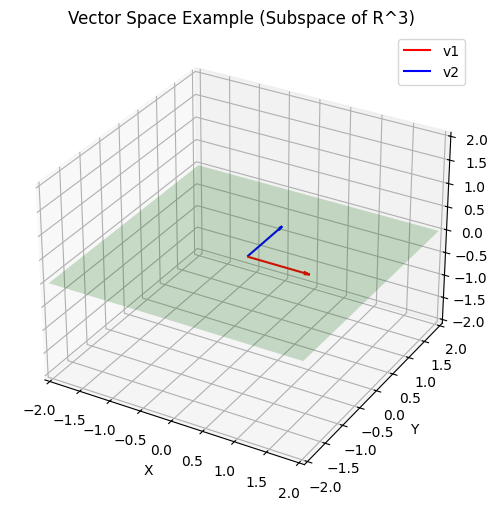

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example vectors spanning a 2D subspace within R^3
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])

# Plotting the vectors
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], arrow_length_ratio=0.1, color='r', label='v1')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], arrow_length_ratio=0.1, color='b', label='v2')

# Visualizing the plane spanned by v1 and v2 (a subspace of R^3) - a simplified plane
x_plane = np.linspace(-2, 2, 10)
y_plane = np.linspace(-2, 2, 10)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = 0 * X_plane # Z = 0 plane for this example since v1 and v2 are in the x-y plane
ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.2, color='green')


ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vector Space Example (Subspace of R^3)')
ax.legend()
plt.show()

The plane above contains those vectors, but it is generated by the orthogonal vectors.

## 3x3 matrix and its graphical representation as three lineal spaces.

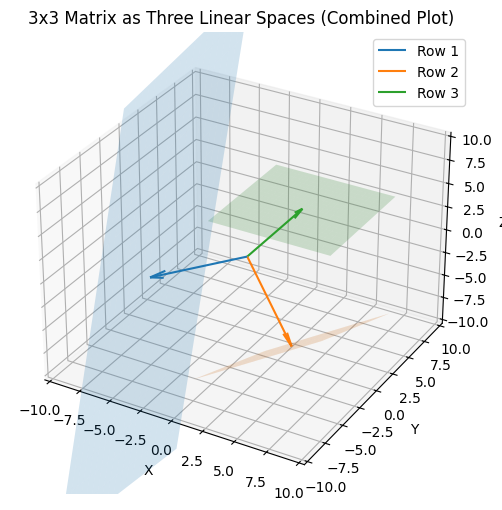

In [11]:
matrix_3x3 = np.array([[-3, -8, 2], [5, -2.5, -6], [0, 8, 0]])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Only one subplot now

for i in range(3):
    row = matrix_3x3[i]
    ax.quiver(0, 0, 0, row[0], row[1], row[2], arrow_length_ratio=0.15, color=f'C{i}', label=f'Row {i+1}') # Labels added
    
    # Plotting the plane spanned by each row (simplified representation) at the vector's end point.
    if np.linalg.norm(row) > 0: # Avoids error if row is the zero vector
        # Create a grid for the plane, centered at the origin
        x_plane, y_plane = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20)) # Smaller grid for better visualization

        # Calculate the z values of the plane.  This is the CORRECTED part:
        if row[2] != 0:
          z_plane = (-row[0] * x_plane - row[1] * y_plane) / row[2]
        else:
          if row[1] != 0:
            z_plane = (-row[0] * x_plane) / row[1] #if row[2] == 0 and row[1] != 0
          else:
            z_plane = 0 * x_plane #if row[2] == 0 and row[1] == 0, then row[0] must be different than 0

        # Shift the plane so it passes through the tip of the vector.
        ax.plot_surface(x_plane + row[0], y_plane + row[1], z_plane + row[2], alpha=0.2, color=f'C{i}') # Shifted plane


ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3x3 Matrix as Three Linear Spaces (Combined Plot)')
ax.legend() # Show the legend
plt.show()

Above, each plane is constructed in a way that it is tangent to the row vector (from the matrix, remember) at its endpoint, *e.g.* the blue plane is generated by the first Row.

This means the row vector lies within the plane, and the plane gives a visual sense of a 2D space associated with that row vector's direction.  It's important to remember that this plane is not uniquely defined by the row vector (there are infinitely many planes that contain the line spanned by the vector).  However, the way we're constructing the plane (by finding an orthogonal direction) gives us a consistent and visually informative representation of a 2D space related to each row vector.

# 3. Matrix Multiplication
******

Matrix multiplication is a fundamental operation that combines two matrices to produce a new matrix. It represents the composition of linear transformations.

**Definition:** If A is an m x n matrix and B is an n x p matrix, their product C = AB is an m x p matrix, where the element c<sub>ij</sub> is the dot product of the i-th row of A and the j-th column of B.

$c_{ij} = \sum_{k=1}^{n} a_{ik}b_{kj}$

**Visualization:** Matrix multiplication can be visualized as a transformation of vectors. A matrix acts on a vector, changing its direction and/or magnitude.

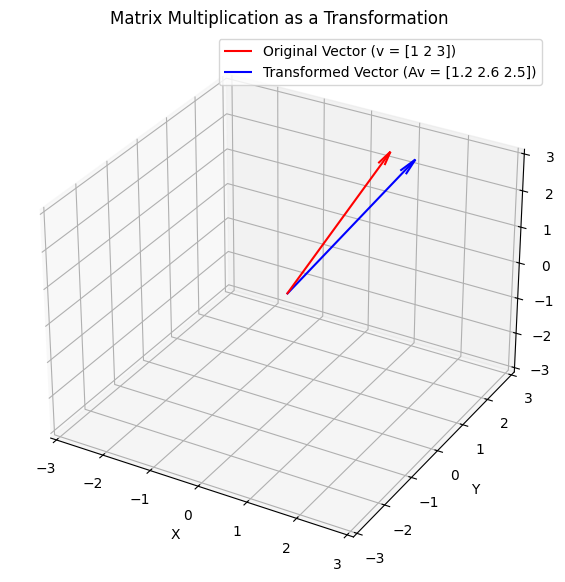

In [44]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

# Lets use these simple vectors, they are fed to Python as arrays:
A = np.array([[0.5, 0.2, 0.1], [0.1, 0.8, 0.3], [0.2, 0.1, 0.7]])  # 3x3 matrix
v = np.array([1, 2, 3])  # 3D vector, remember: shape is 1X3 

# this, the resulting matrix will be: 1X3.

v_transformed = A @ v  # This is a Matrix-vector multiplication

# Now we plot the vectors (original and transformed)
# Plotting the original and transformed vectors with labels showing the vector values
ax.quiver(0, 0, 0, v[0], v[1], v[2], arrow_length_ratio=0.09, color='r', label=f'Original Vector (v = {v})')
ax.quiver(0, 0, 0, v_transformed[0], v_transformed[1], v_transformed[2], arrow_length_ratio=0.1, color='b', label=f'Transformed Vector (Av = {v_transformed})')


ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Matrix Multiplication as a Transformation')
ax.legend()
plt.show()

Now, the following code shows some **Python Code Examples:**

Let $A = \begin{bmatrix} 1 & 2 \\ 3&4 \end{bmatrix}$, $B = \begin{bmatrix} 5 & 6 \\ 7&8 \end{bmatrix}$,  and $v = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$.

This are 2x2 matrix and a transposed vector. Let's multiply:

**Case1:** 

 $C = AB = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}$ = $\begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}$. 

 Note that the order in which you multiply affects the result. This is crucial:

 $D = BA = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ = $\begin{bmatrix} 23 & 34 \\ 31 & 46 \end{bmatrix}$. 

**Case2:**

 $W = Av = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ = $\begin{bmatrix} 5 \\ 11 \end{bmatrix}$. 

And:

 $W1 = vA = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ = $\begin{bmatrix} 7 \\ 10 \end{bmatrix}$.

The first one involves a 2x2 matrix vs a 2x1 vector that gives us a 2,1 matrix/vector.

In [50]:
# First, set them up in python
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
v = np.array([1, 2])

Case 1: Matrix multiplication

In [57]:
C = A @ B  # or C = np.dot(A, B)
print(C)

# REMEMBER: The order affects:
D = B @ A
print("Order AFFECTS. This is important!:")
print("D=",D)

[[19 22]
 [43 50]]
Order AFFECTS. This is important!:
D= [[23 34]
 [31 46]]


Case 2. Matrix-vector multiplication

In [58]:
w = A @ v
print(w)

# REMEMBER: The order affects:
w1 = v @ A
print(w1)

[ 5 11]
[ 7 10]


[XXXXX]

****
**SGMS 2025** Under construction.